# US Labor Statistics Analysis
We set out to find out some interesting insights about some of the factors that may affect income of workers in the US.
Some key notes about this dataset:
* It surveys employed full time workers
* Count is the number of persons counted in thousands
* Weekly earnings is the median weekly earnings in common US dollars

In [1]:
# Installing the required libraries
!pip install prophet

In [2]:
# Importing the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the `files` library to allow files upload
from google.colab import files

In [4]:
# Upload "project_1_final.csv" into Colab, then store in a DataFrame
uploaded = files.upload()

Saving project_1_final.csv to project_1_final (1).csv


In [5]:
# Storing the data in a Pandas DataFrame
# Setting the "Year" column as the Datetime Index.

df_labor_stats_raw = pd.read_csv(
    "project_1_final.csv",
    index_col='Year',
    parse_dates=True
)
# Removing unwanted columns
df_labor_stats = df_labor_stats_raw[["Gender", "Race", "Level of Education", "Count", "Weekly Earnings"]]

# Review the first and last five rows of the DataFrame
display(df_labor_stats.head())
display(df_labor_stats.tail())

,Gender,Race,Level of Education,Count,Weekly Earnings
Year,,,,,
2000-01-01,All,ALL,ALL,101210.0,NaN
2000-01-01,All,ALL,ALL,NaN,576.0
2000-01-01,Male,ALL,ALL,57107.0,NaN
2000-01-01,Male,ALL,ALL,NaN,641.0
2000-01-01,Female,ALL,ALL,44103.0,NaN


,Gender,Race,Level of Education,Count,Weekly Earnings
Year,,,,,
2023-01-01,Female,ALL,Bachelor's degree or higher,NaN,1437.0
2023-01-01,Female,ALL,Bachelor's degree only,14768.0,NaN
2023-01-01,Female,ALL,Bachelor's degree only,NaN,1318.0
2023-01-01,Female,ALL,Advanced degree,10242.0,NaN
2023-01-01,Female,ALL,Advanced degree,NaN,1603.0


In [6]:
#Creating a Weekly Earnings only dataframe
all_weekly_earnings = df_labor_stats[["Gender", "Race", "Level of Education", "Weekly Earnings"]].dropna()
all_weekly_earnings.head()

,Gender,Race,Level of Education,Weekly Earnings
Year,,,,
2000-01-01,All,ALL,ALL,576.0
2000-01-01,Male,ALL,ALL,641.0
2000-01-01,Female,ALL,ALL,493.0
2000-01-01,All,White,ALL,590.0
2000-01-01,Male,White,ALL,662.0


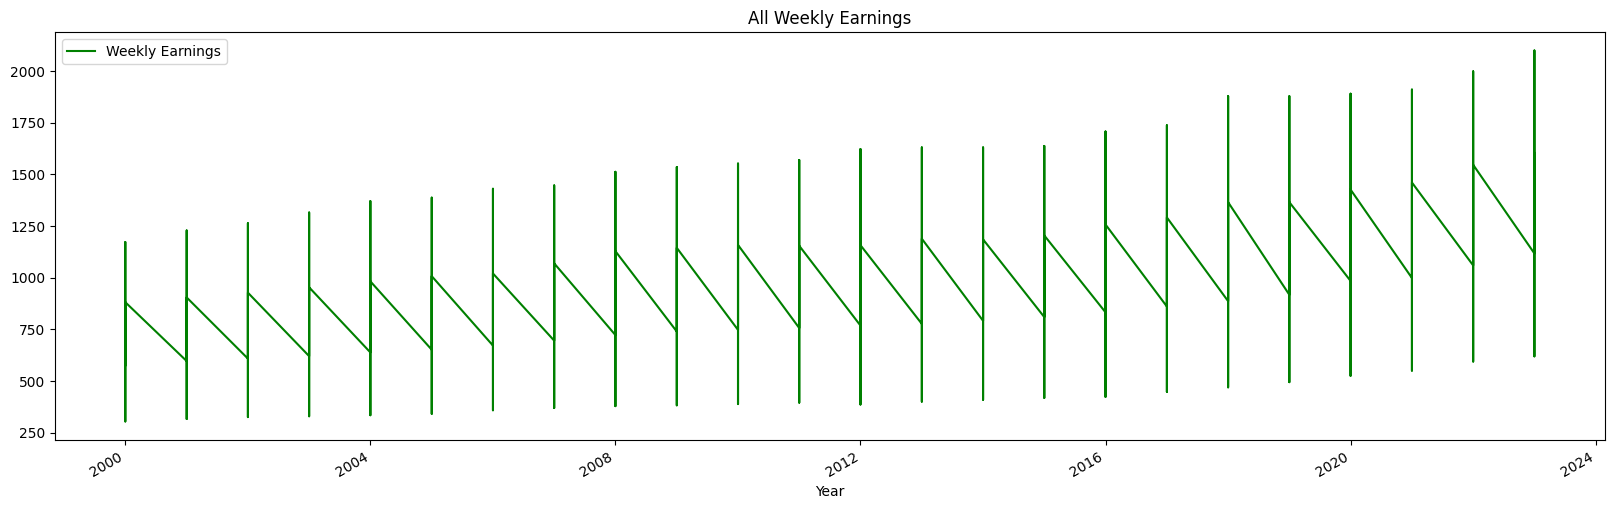

In [7]:
# Plotting Weekly Earnings for all workers 2000-2013

all_weekly_earnings.plot( y='Weekly Earnings', color=['green', 'orange'], title='All Weekly Earnings')
plt.gcf().set_size_inches(20, 6)
plt.show()

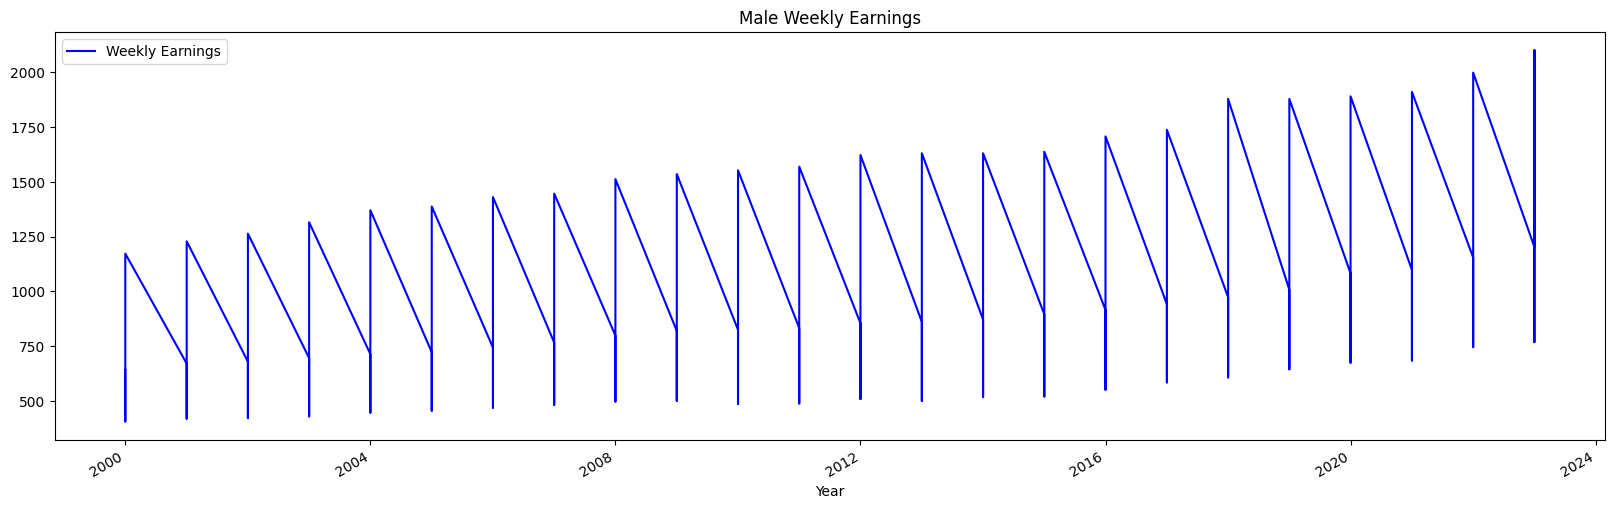

In [8]:
# Plotting Weekly Earnings for Men 2000-2013
all_weekly_earnings.loc[all_weekly_earnings['Gender'] == 'Male'].plot( y='Weekly Earnings', color=['blue'], title='Male Weekly Earnings')
plt.gcf().set_size_inches(20, 6)
plt.show()

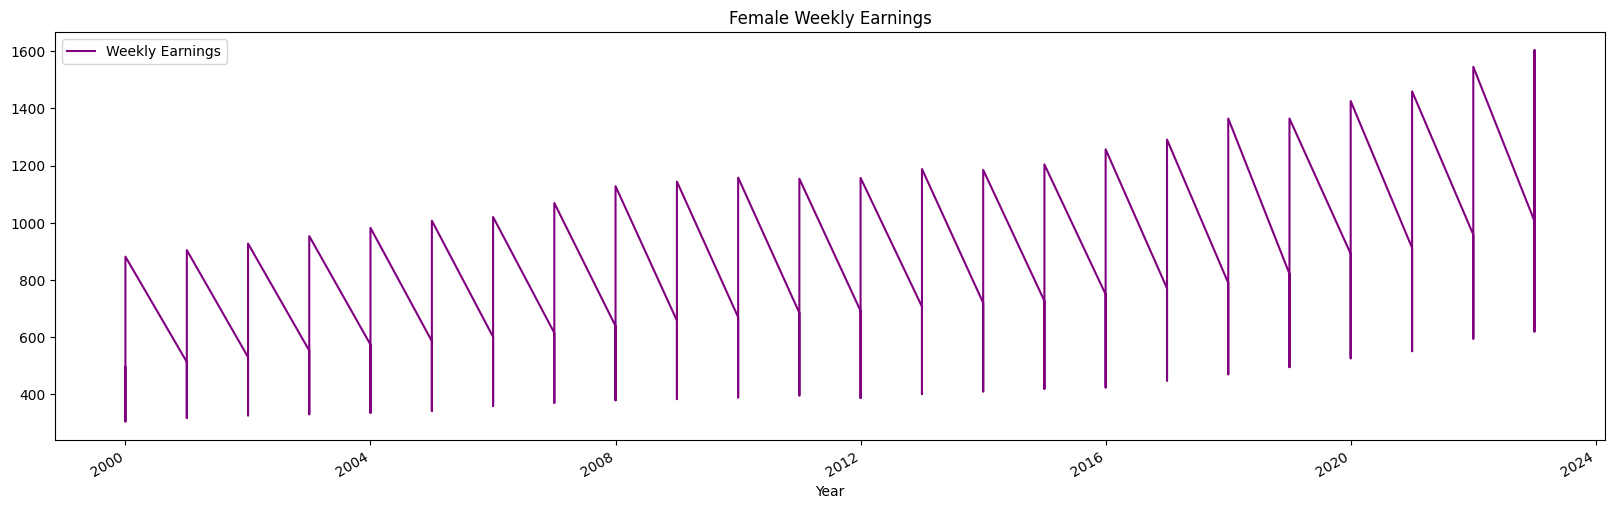

In [9]:
# Plotting Weekly Earnings for Women 2000-2013
all_weekly_earnings.loc[all_weekly_earnings['Gender'] == 'Female'].plot( y='Weekly Earnings', color=['purple'], title='Female Weekly Earnings')
plt.gcf().set_size_inches(20, 6)
plt.show()

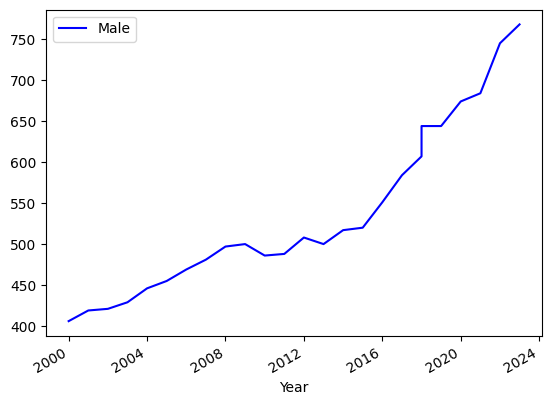

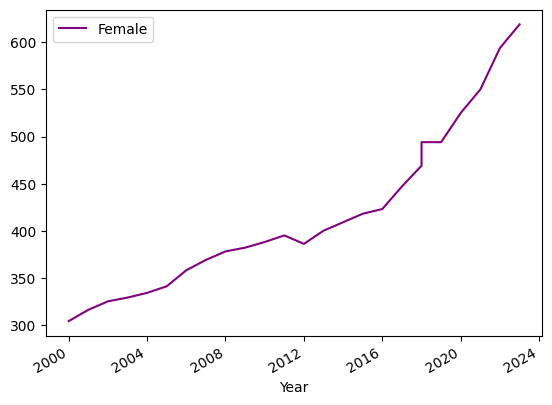

In [10]:
# Plotting Weekly Earnings for Women 2000-2013
all_weekly_earnings.loc[(all_weekly_earnings['Gender'] == 'Male') & (all_weekly_earnings['Level of Education'] == 'Less than a high school diploma')].plot( y='Weekly Earnings', color=['blue'], label='Male' )
all_weekly_earnings.loc[(all_weekly_earnings['Gender'] == 'Female') & (all_weekly_earnings['Level of Education'] == 'Less than a high school diploma')].plot( y='Weekly Earnings', color=['purple'], label='Female')
#plt.gcf().set_size_inches(20, 6)
plt.legend()
plt.show()